<a href="https://colab.research.google.com/github/CarlMk7734/project1/blob/main/churn_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA and Prediction**

Churn is a one of the biggest problem in the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt
%matplotlib inline

First we read the data file in the python notebook

In [ ]:
telco_base_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [52]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Then we explore the data to see if there are any missing values.

In [ ]:
# Checking the data types of all the columns
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Converting Total Charges to a numerical data type.
telco_base_data.TotalCharges = pd.to_numeric(telco_base_data.TotalCharges, errors='coerce')
telco_base_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After looking at the above output, we can say that there are 11 missing values for Total Charges. Let us replace remove these 11 rows from our data set

In [ ]:
#Removing missing values
telco_base_data.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telco_base_data.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<Axes: >

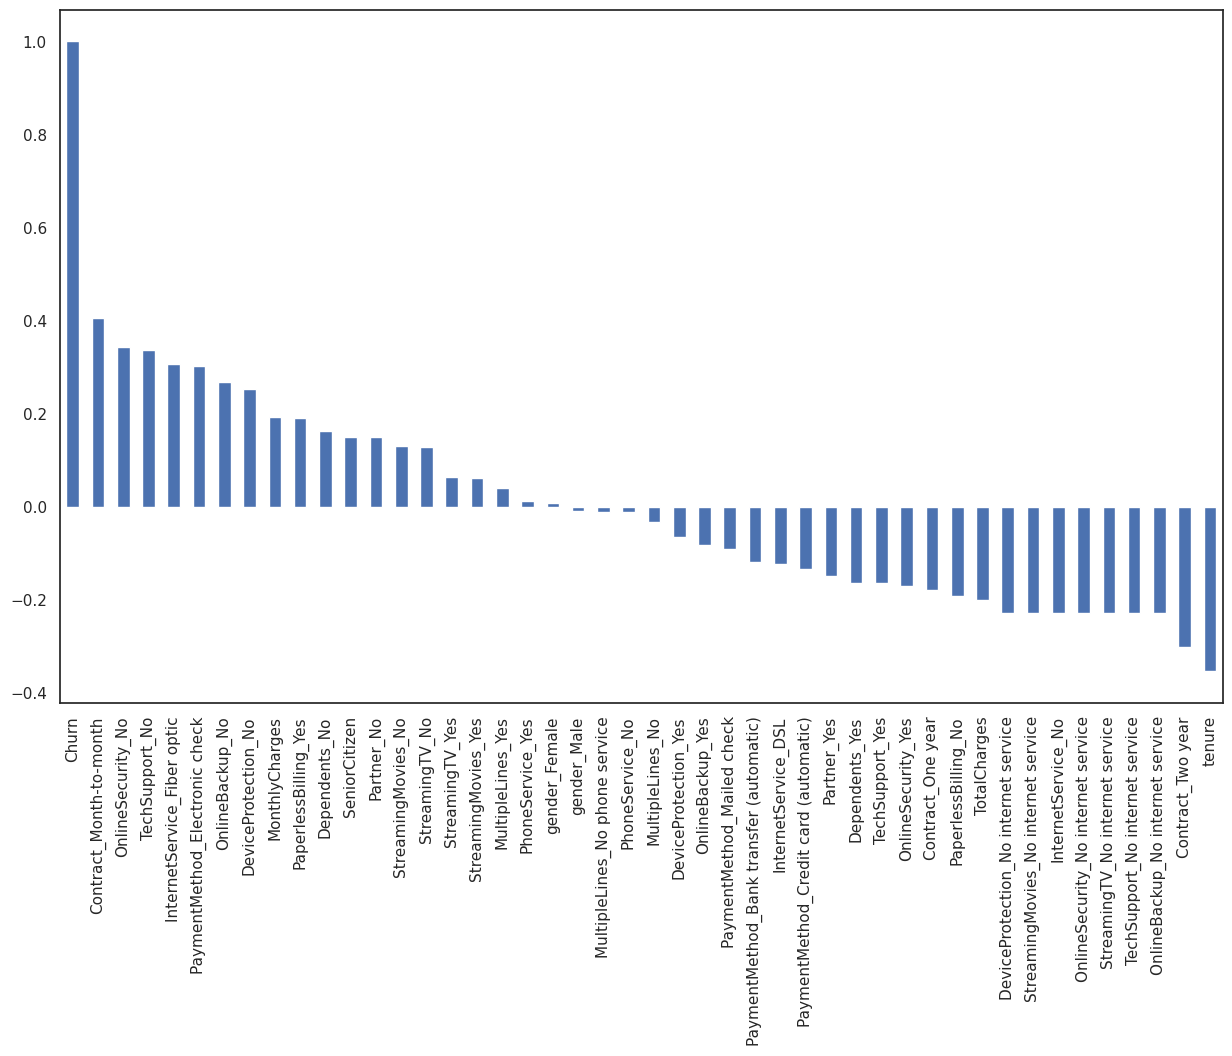

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,9))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

#**Data Exploration**
#Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.



1.  ## **Demographics**- Let us first understand the gender, age range, patner and dependent status of the customers

   a)**Gender Distribution** - About half of the customers in our data set are male while the other half are female








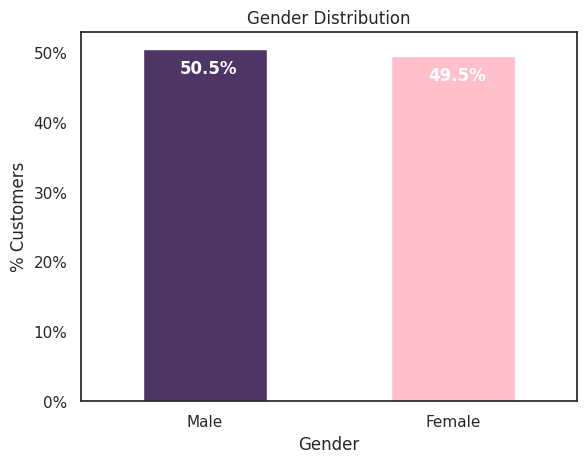

In [ ]:
colors = ['#4D3565','#FFC0CB']
ax = (telco_base_data['gender'].value_counts()*100.0 /len(telco_base_data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')



b) % Senior Citizens - There are only 16.2% of the customers who are senior citizens. Thus most of our customers in the data are younger people.



Text(0.5, 1.0, '% of Senior Citizens')

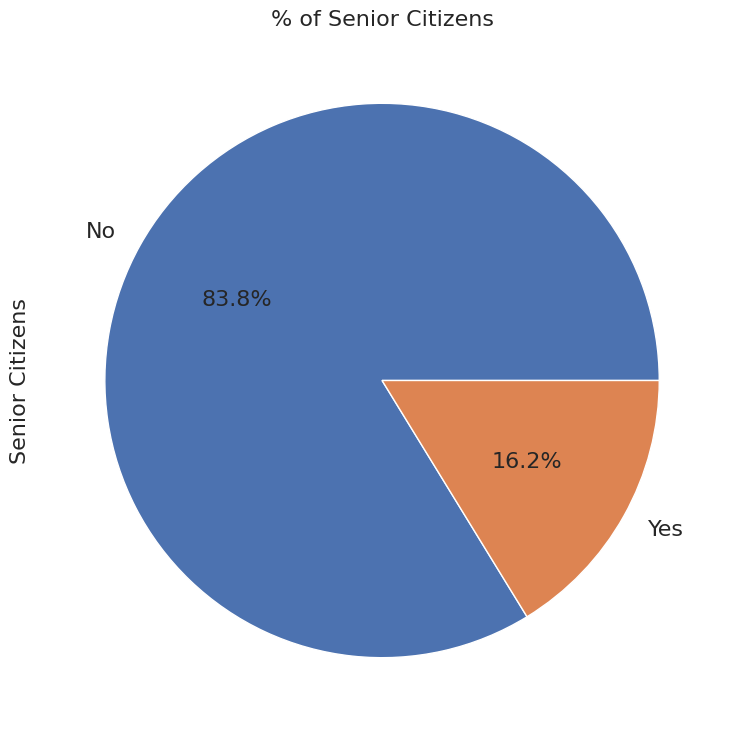

In [ ]:
ax = (telco_base_data['SeniorCitizen'].value_counts()*100.0 /len(telco_base_data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(9,9), fontsize = 16 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 16)
ax.set_title('% of Senior Citizens', fontsize = 16)

c) Partner and dependent status - 48% of the customers have a partner,while only 30% of the total customers have dependents.

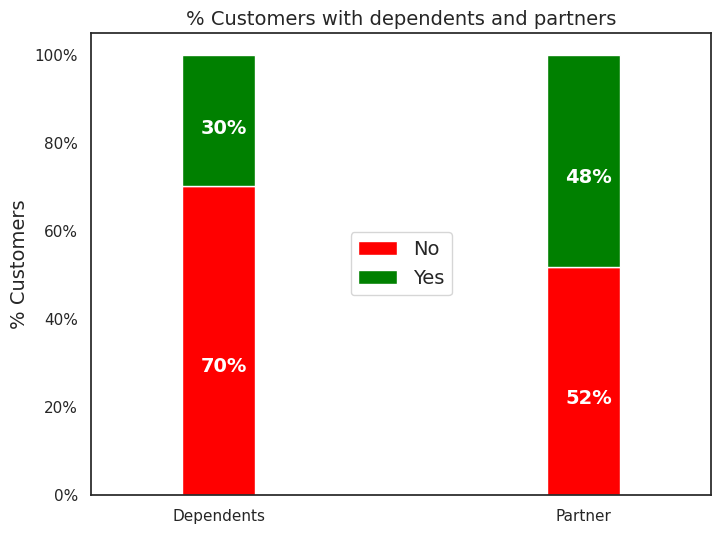

In [ ]:
df2 = pd.melt(telco_base_data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telco_base_data)
colors = ['#FF0000','#008000']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

###**What would be interesting is to look at the % of customers, who have partners, also have dependents. We will explore this next.**

Interestingly, among the customers who have a partner, only about half of them also have a dependent, while other half do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority (80%) of them do not have any dependents .

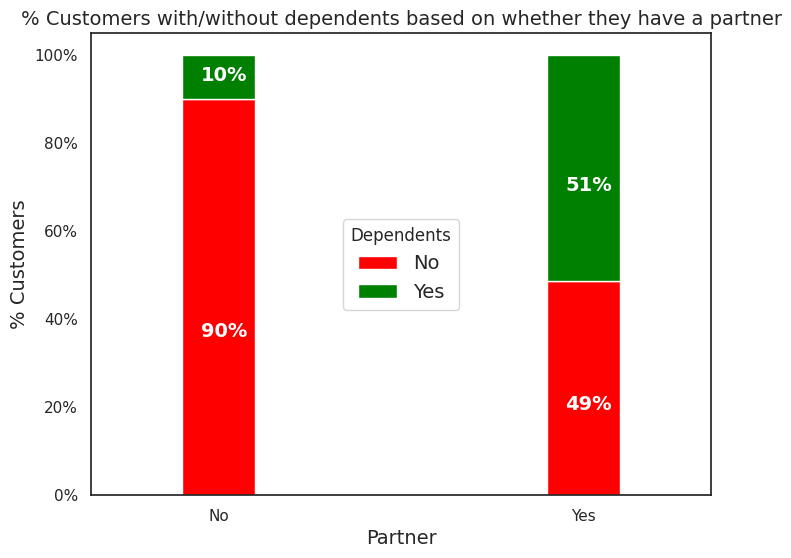

In [ ]:
colors = ['#FF0000','#008000']
partner_dependents = telco_base_data.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

I also looked at any differences between the % of customers with/without dependents and partners by gender. There is no difference in their distribution by gender. Additionally, there is no difference in senior citizen status by gender.

**B.) Customer Account Information**: Let us now look at the tenure, contract


**1. Tenure**: After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

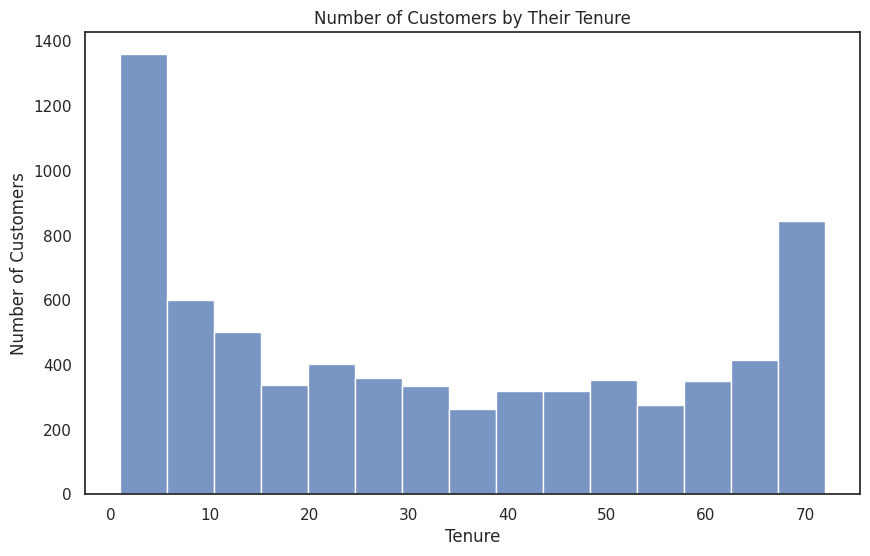

In [152]:
# Create a histogram using histplot
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=telco_base_data, x='tenure', kde=False)

plt.title('Number of Customers by Their Tenure')
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.show()


2. Contracts: To understand the above graph, lets first look at the number of customers by different contracts.

Text(0.5, 1.0, 'number of Customers by Contract Type')

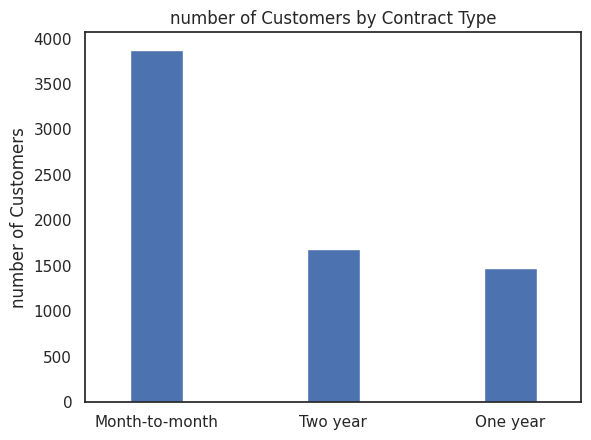

In [ ]:
ax = telco_base_data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('number of Customers')
ax.set_title('number of Customers by Contract Type')

As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

Below we will understand the tenure of customers based on their contract type.

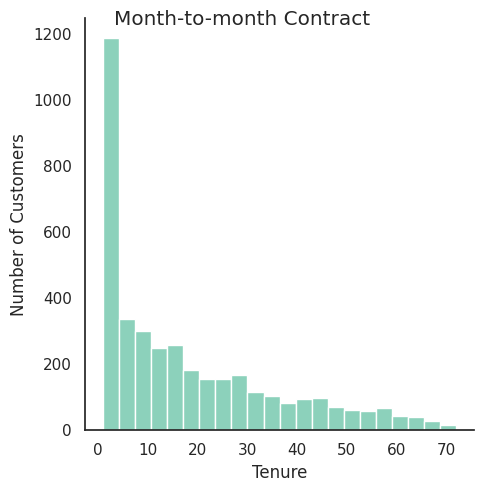

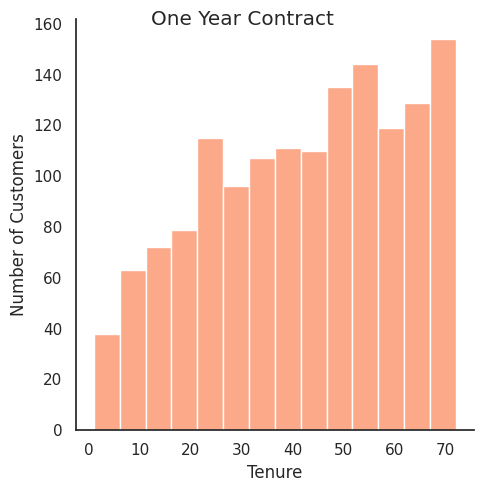

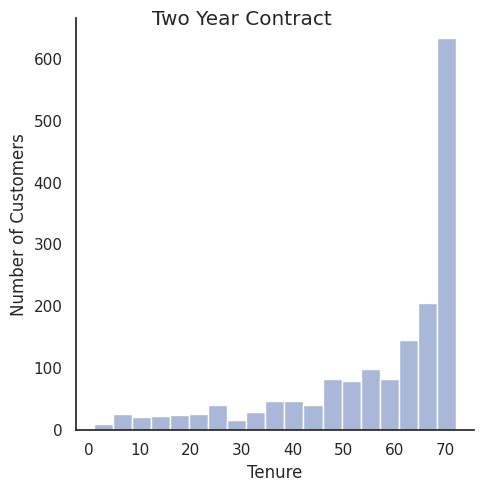

In [69]:
# Define a color palette for the plots
colors = sns.color_palette("Set2")

# Month-to-month contract
ax1 = sns.displot(data=telco_base_data[telco_base_data['Contract'] == 'Month-to-month']['tenure'], kde=False, color=colors[0])
ax1.set_axis_labels(x_var='Tenure', y_var='Number of Customers')
ax1.fig.suptitle('Month-to-month Contract')

# One-year contract
ax2 = sns.displot(data=telco_base_data[telco_base_data['Contract'] == 'One year']['tenure'], kde=False, color=colors[1])
ax2.set_axis_labels(x_var='Tenure', y_var='Number of Customers')
ax2.fig.suptitle('One Year Contract')

# Two-year contract
ax3 = sns.displot(data=telco_base_data[telco_base_data['Contract'] == 'Two year']['tenure'], kde=False, color=colors[2])
ax3.set_axis_labels(x_var='Tenure', y_var='Number of Customers')
ax3.fig.suptitle('Two Year Contract')

plt.show()




Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

This is also what we saw in the earlier chart on correlation with the churn rate.

**C. Let us now look at the distribution of various services used by customers**

In [ ]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

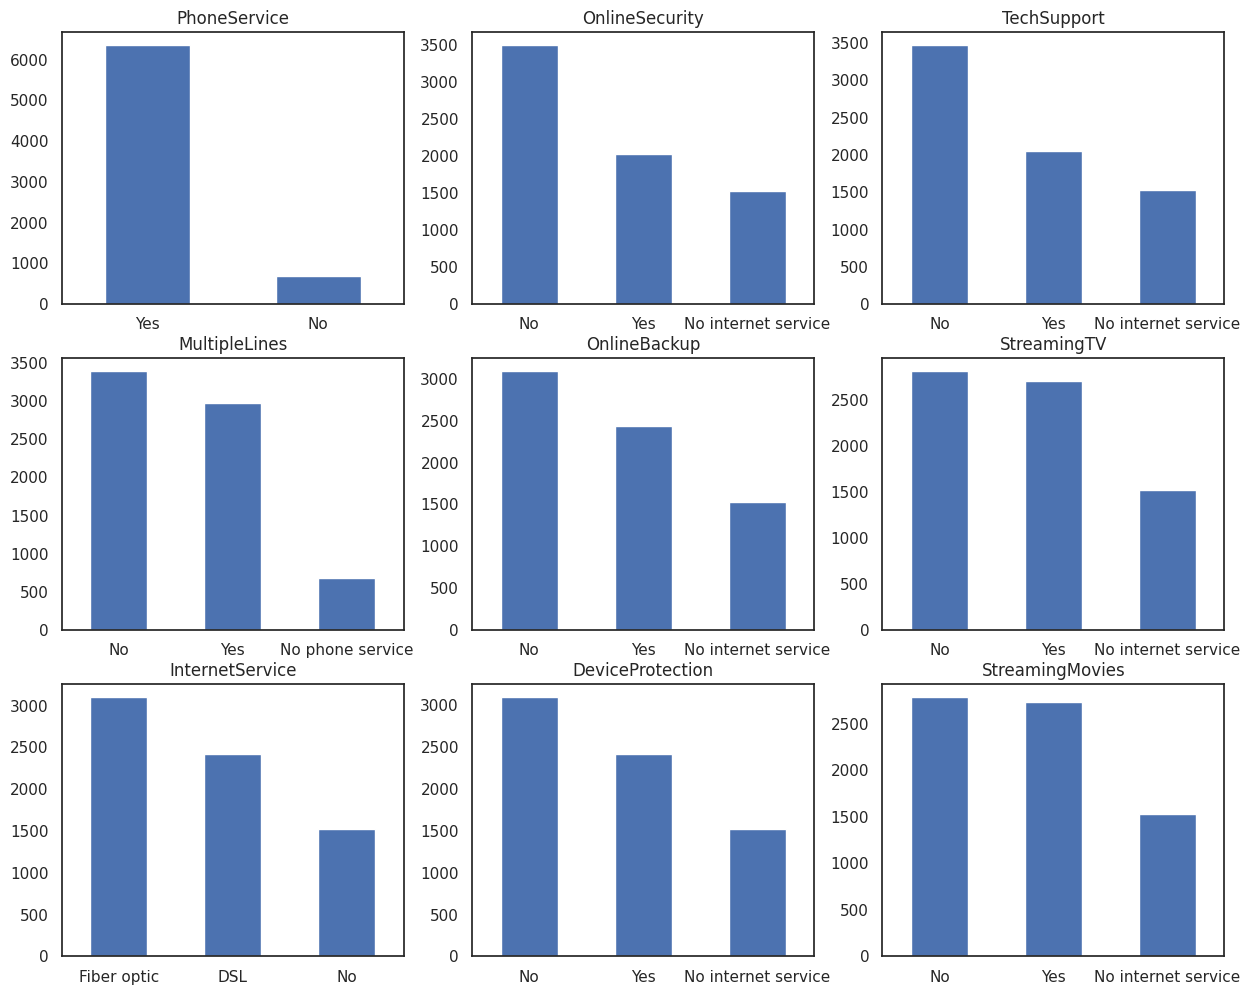

In [153]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telco_base_data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)

    elif i >=3 and i < 6:
        ax = telco_base_data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)

    elif i < 9:
        ax = telco_base_data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

**D.) Now let's take a quick look at the relation between monthly and total charges**

We will observe that the total charges increases as the monthly bill for a customer increases.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

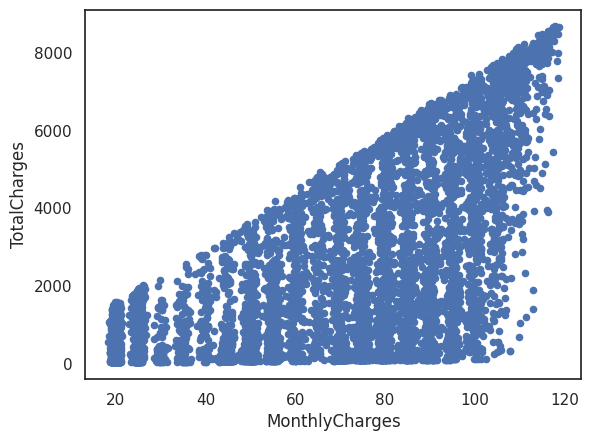

In [53]:
telco_base_data[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

**E.) Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot.**

Lets first look at the churn rate in our data

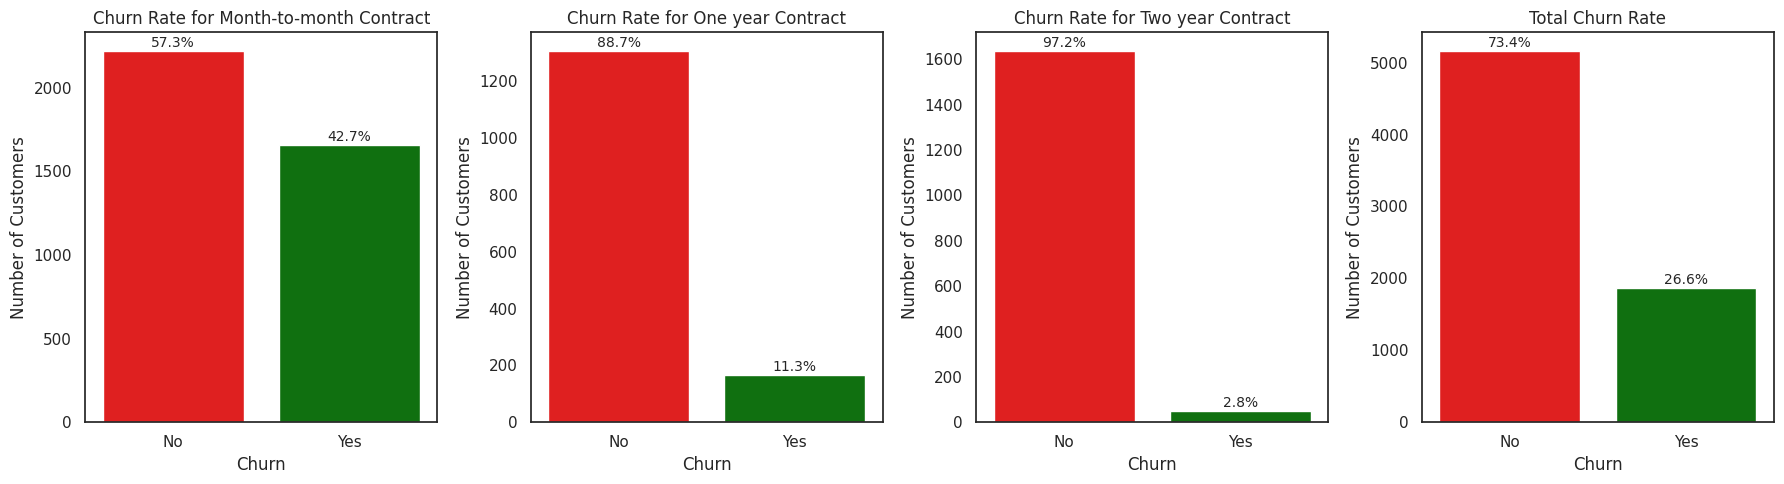

In [77]:
# Define a color palette for the plots
colors = sns.color_palette("Set2")

# Define contract types
contract_types = ['Month-to-month', 'One year', 'Two year']

# Define colors for "No" and "Yes" churn
churn_colors = {'No': 'red', 'Yes': 'green'}

# Create subplots for contract types and total data
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 5))

for i, contract_type in enumerate(contract_types):
    ax = sns.countplot(data=telco_base_data[telco_base_data['Contract'] == contract_type], x='Churn', palette=[churn_colors['No'], churn_colors['Yes']], ax=axes[i])
    ax.set_xlabel('Churn')
    ax.set_ylabel('Number of Customers')
    ax.set_title(f'Churn Rate for {contract_type} Contract')

    # Add percentage labels above the bars
    total = len(telco_base_data[telco_base_data['Contract'] == contract_type])
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{(height / total * 100):.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

# Create a total data count plot
ax_total = sns.countplot(data=telco_base_data, x='Churn', palette=[churn_colors['No'], churn_colors['Yes']], ax=axes[-1])
ax_total.set_xlabel('Churn')
ax_total.set_ylabel('Number of Customers')
ax_total.set_title('Total Churn Rate')

# Add percentage labels above the bars for the total data
total_total = len(telco_base_data)
for bar in ax_total.patches:
    height = bar.get_height()
    ax_total.annotate(f'{(height / total_total * 100):.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                      xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.
i.) Churn vs Tenure: As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

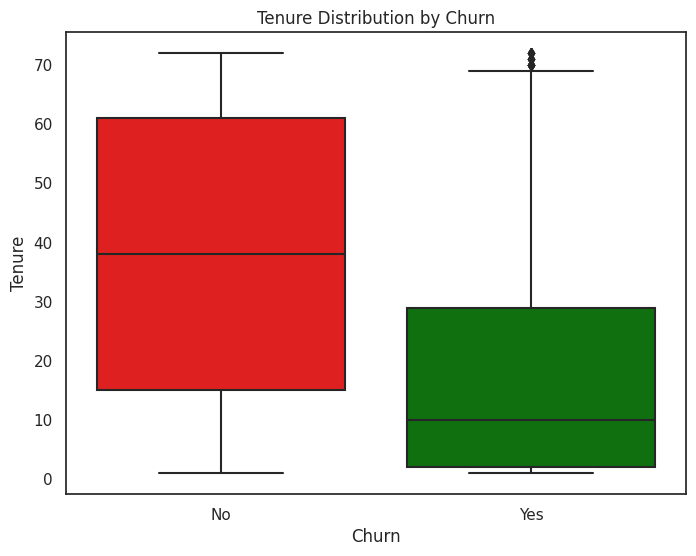

In [89]:
# Create the box plot with specified colors
plt.figure(figsize=(8, 6))
sns.boxplot(x=telco_base_data['Churn'], y=telco_base_data['tenure'], palette={"No": "red", "Yes": "green"})

# Set labels and title
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Tenure Distribution by Churn')

plt.show()


**ii.) Churn by Contract Type:** Similar to what we saw in the correlation plot, the customers who have a month to month contract have a very high churn rate.

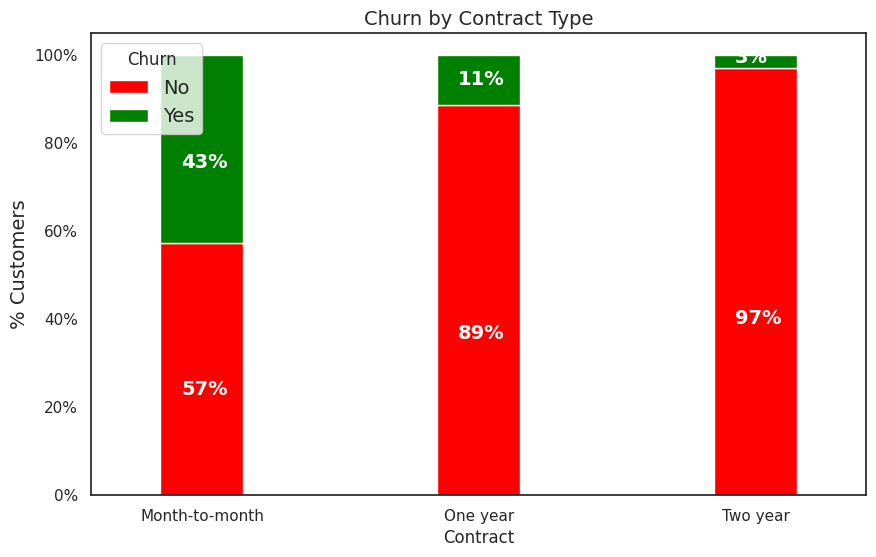

In [107]:
colors = ['#FF0000','#008000']
contract_churn = telco_base_data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)


**iii.) Churn by Seniority:** Senior Citizens have almost double the churn rate than younger population.

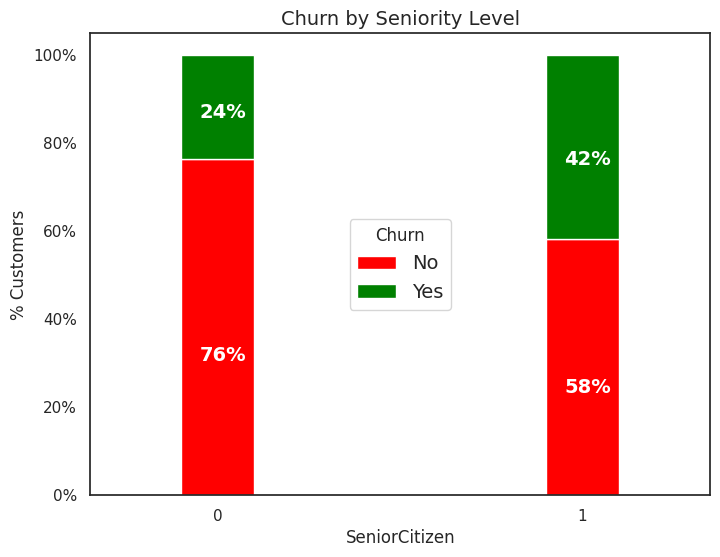

In [108]:
colors = ['#FF0000','#008000']
seniority_churn = telco_base_data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

**iv.) Churn by Monthly Charges:** Higher % of customers churn when the monthly charges are high.

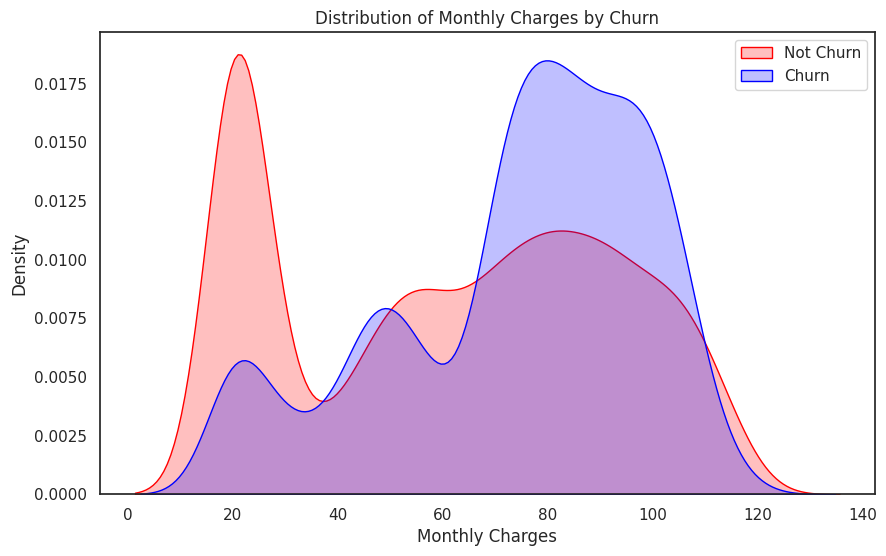

In [111]:
# Create two KDE plots for "No" and "Yes" churn
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data["Churn"] == 'No')],
                 color="Red", fill=True)
ax = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data["Churn"] == 'Yes')],
                 ax=ax, color="Blue", fill=True)

# Set labels and legend
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

plt.show()


**v.) Churn by Total Charges:** It seems that there is higer churn when the total charges are lower.

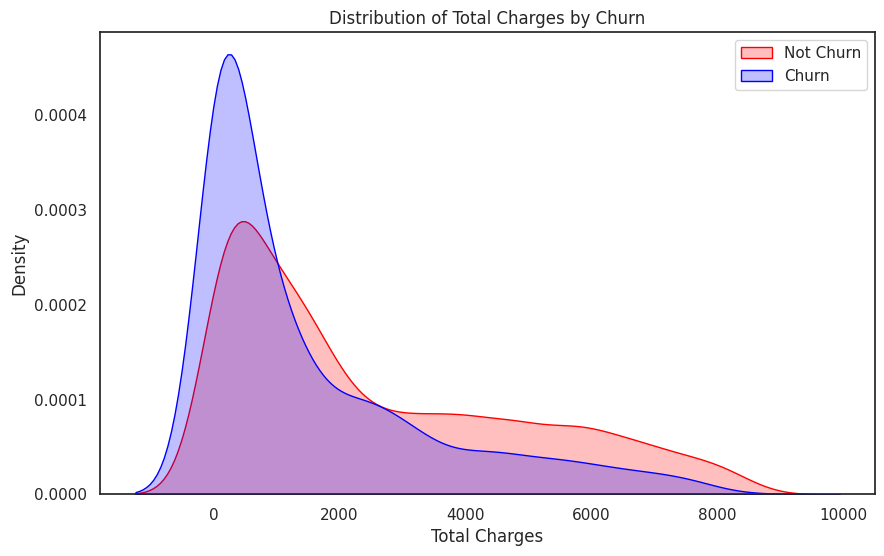

In [114]:
# Create two KDE plots for "No" and "Yes" churn
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data["Churn"] == 'No')],
                 color="Red", fill=True)
ax = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data["Churn"] == 'Yes')],
                 ax=ax, color="Blue", fill=True)

# Set labels and legend
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')

plt.show()


After going through the above EDA we will develop some predictive models and compare them.
We will develop Logistic Regression, Random Forest, SVM, ADA Boost and XG Boost

1. Logistic Regression

In [115]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

It is important to scale the variables in logistic regression so that all of them are within a range of 0 to 1. This helped me improve the accuracy from 79.7% to 80.7%. Further, you will notice below that the importance of variables is also aligned with what we are seeing in Random Forest algorithm and the EDA we conducted above.

In [116]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [117]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [118]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


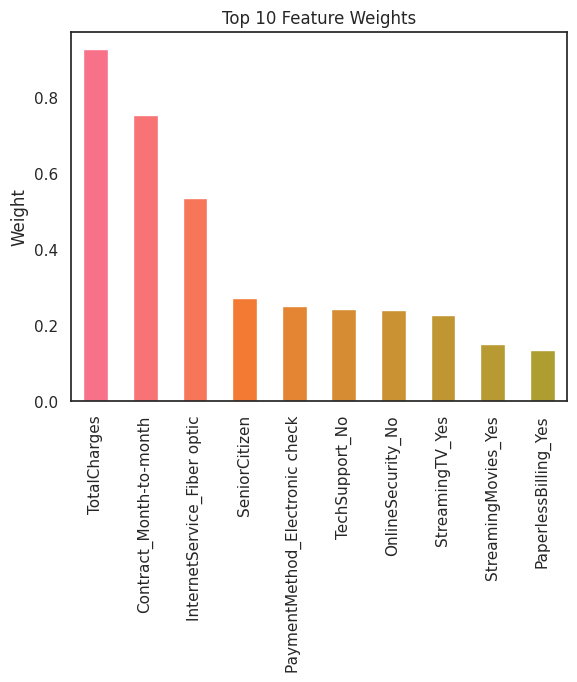

In [120]:
# Create a custom color palette with unique colors for each bar
custom_palette = sns.color_palette("husl", len(weights))

# Sort the weights and create a bar chart with the custom colors
ax = weights.sort_values(ascending=False)[:10].plot(kind='bar', color=custom_palette)

# Set labels and title
ax.set_ylabel('Weight')
ax.set_title('Top 10 Feature Weights')

plt.show()


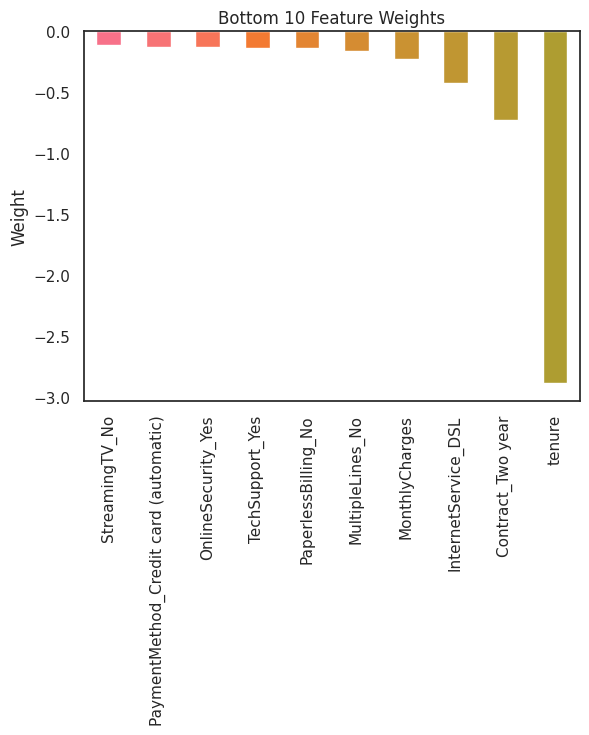

In [122]:
# Create a custom color palette with unique colors for each bar
custom_palette = sns.color_palette("husl", len(weights))

# Sort the weights and create a bar chart with the custom colors
ax = weights.sort_values(ascending=False)[-10:].plot(kind='bar', color=custom_palette)

# Set labels and title
ax.set_ylabel('Weight')
ax.set_title('Bottom 10 Feature Weights')

plt.show()


**Observations**

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
Having DSL internet service also reduces the proability of Churn
Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. We need to explore more to better understad why this is happening.
Any hypothesis on the above would be really helpful!

**2. Random Forest**

In [125]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier with max_features set to 'sqrt'
clf = RandomForestClassifier(max_features='sqrt')

# Fit the classifier to your data and perform other operations as needed
print (metrics.accuracy_score(y_test, prediction_test))


0.8088130774697939


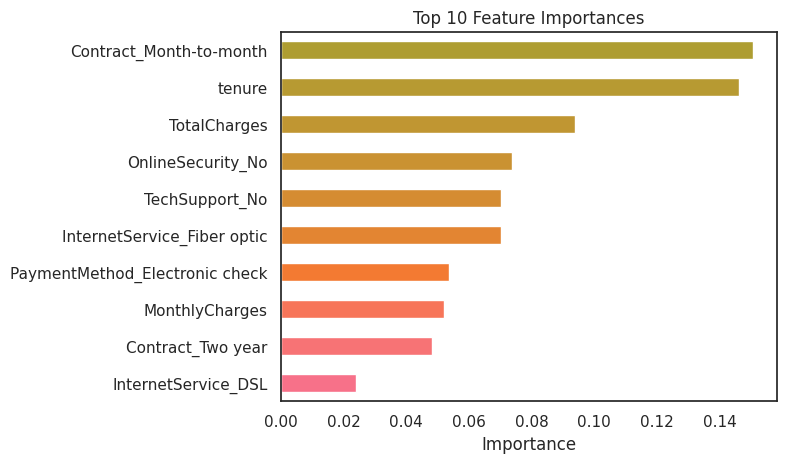

In [127]:
# Get the feature importances
importances = model_rf.feature_importances_

# Create a custom color palette with unique colors for each bar
custom_palette = sns.color_palette("husl", len(importances))

# Create a Series with importances and corresponding feature names
weights = pd.Series(importances, index=X.columns.values)

# Sort the importances and create a horizontal bar chart with the custom colors
ax = weights.sort_values()[-10:].plot(kind='barh', color=custom_palette)

# Set labels and title
ax.set_xlabel('Importance')
ax.set_title('Top 10 Feature Importances')

plt.show()


**Observations:**

From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.
The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

**3. Support Vecor Machine (SVM)**

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [129]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear')
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.820184790334044

In [130]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,preds))

[[953  89]
 [164 201]]


Wth SVM the accuracy was able to be increased upto 82%. However, we need to take a deeper look at the true positive and true negative rates, including the Area Under the Curve (AUC) for a better prediction. I will explore this soon.

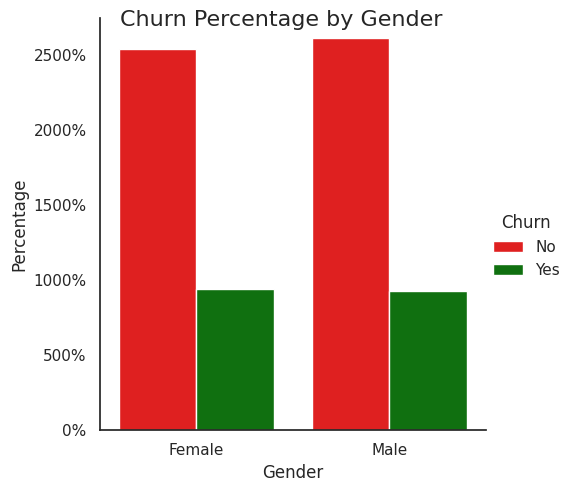

In [136]:
# Define a custom color palette with red for "No" and green for "Yes"
colors = {"No": "red", "Yes": "green"}

# Create the catplot with the specified colors
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=telco_base_data, palette=colors,
                  estimator=lambda x: sum(x == "No") * 100.0 / len(x))

# Set labels and title
ax1.set_axis_labels(x_var='Gender', y_var='Percentage')
fig = plt.gcf()  # Get the current figure
fig.suptitle('Churn Percentage by Gender', fontsize=16)  # Set the title

# Format the y-axis as a percentage
ax1.ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


**4. ADA Boost**

In [137]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value)
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8159203980099502

5. XG Boost

In [138]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8059701492537313

Interestingly with XG Boost,  the accuracy on test data was increased to almost 83%. Clearly, XG Boost is a winner among all other techniques. XG Boost is a slow learning model and is based on the concept of Boosting